# Face Detection/Recognition/Manipulation

In [3]:
import numpy as np
from skimage.feature import hog
from skimage import data, exposure
import face_recognition

from PIL import Image, ImageEnhance, ImageDraw
import IPython.display
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

font_config = {'size': 16}
fig_config = {'figsize': (12, 8)}
line_config = {'linewidth': 4}
plt.rc('font', **font_config)
plt.rc('figure', **fig_config)
plt.rc('lines', **line_config)

rc = {"axes.spines.left" : False,
      "axes.spines.right" : False,
      "axes.spines.bottom" : False,
      "axes.spines.top" : False,
      "xtick.bottom" : False,
      "xtick.labelbottom" : False,
      "ytick.labelleft" : False,
      "ytick.left" : False}
plt.rcParams.update(rc)

## 1. Find faces in a picture

## 1.1 Histogram of Oriented Gradients (HOG) visualization

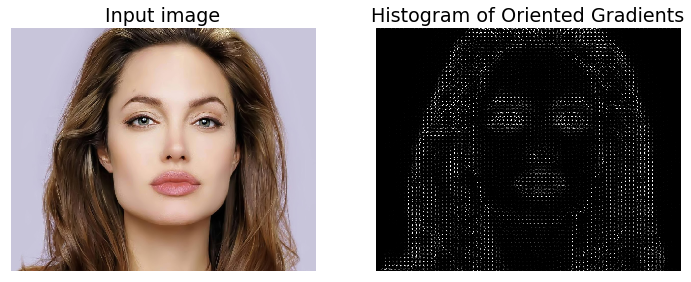

In [4]:
image = face_recognition.load_image_file("img/angelina_jolie.jpg")

fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, multichannel=True)

fig, ax = plt.subplots(1, 2)

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax[1].imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax[1].set_title('Histogram of Oriented Gradients')
plt.show()

Try it with your own image

You can see here HOG will be same for different lighting condition

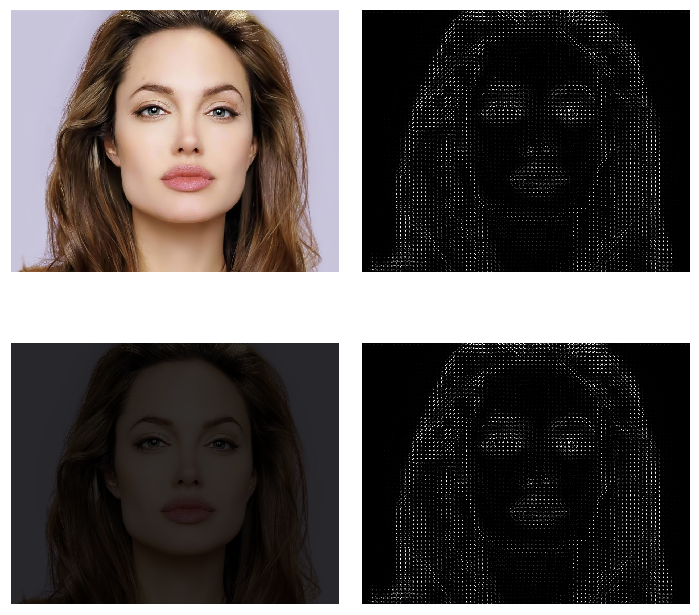

In [5]:
# Increase or decrease the brightness of an image
pil_image = Image.fromarray(image)
enhancer = ImageEnhance.Brightness(pil_image)
enhanced_im = enhancer.enhance(0.2)

fd1, hog_image_enhanced= hog(image, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, multichannel=True)


# Rescale histogram for better display
hog_image = exposure.rescale_intensity(hog_image, in_range=(0, 10))
hog_image_enhanced = exposure.rescale_intensity(hog_image_enhanced, in_range=(0, 10))

fig, axarr = plt.subplots(2, 2, figsize=(10,10))

axarr[0,0].imshow(image, cmap=plt.cm.gray)

axarr[0,1].imshow(hog_image, cmap=plt.cm.gray)

axarr[1,0].imshow(enhanced_im, cmap=plt.cm.gray)

axarr[1,1].imshow(hog_image_enhanced, cmap=plt.cm.gray)

plt.tight_layout()
plt.show()

## 1.2 Automatically find all the faces in an image

I found 9 face(s) in this photograph.
	 Top	Left	Bottom	Right
0	|163	225	225	287
1	|198	17	260	80
2	|146	635	221	710
3	|118	579	170	631
4	|30	436	105	511
5	|205	149	267	211
6	|182	688	234	740
7	|113	46	188	121
8	|101	107	163	170


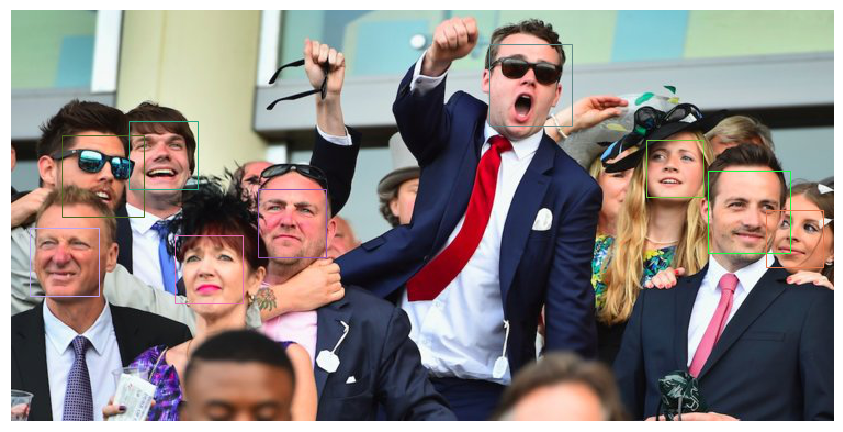

In [14]:
# Load the jpg file into a numpy array
image = face_recognition.load_image_file("img/multiple_people.jpg")

# Find all the faces in the image using the default HOG-based model.
face_locations = face_recognition.face_locations(image)

fig,ax = plt.subplots(1)
ax.imshow(image)

print("I found {} face(s) in this photograph.".format(len(face_locations)))
print("\t Top\tLeft\tBottom\tRight")

for i, face_location in enumerate(face_locations):

    # Print the location of each face in this image
    top, right, bottom, left = face_location
    print("{}\t|{}\t{}\t{}\t{}".format(i,top, left, bottom, right))

    # Draw a box around the face
    ax.add_patch(patches.Rectangle((left, top), right-left, bottom-top, fill=False)) 
    
# Display the result
plt.tight_layout()
plt.show()

Now, try to crop faces instead of draw a rectangle

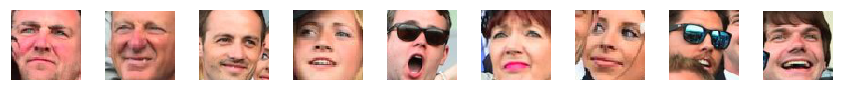

In [8]:
fig,ax = plt.subplots(1, len(face_locations))
for i, face_location in enumerate(face_locations):

    top, right, bottom, left = face_location   
    #Add the code to extract face_image from image given the top, right, bottom and left
    face_image = image[top:bottom, left:right]
    
    ax[i].imshow(face_image)
plt.tight_layout()

Finding all the faces in the image using the default HOG-based model is fairly accurate, but not as accurate as the CNN model
So we can use a pre-trained convolutional neural network.
This method is more accurate than the default HOG model, but it's slower

Let's find all faces using CNN

In [ ]:
# Hint: Replace this code
face_locations = face_recognition.face_locations(image, model="cnn")

### Use random colors to draw a box around every faces
Hint: We define every color by 3 value of R (red), G (green) and B (blue).

In [12]:
color = tuple(np.random.rand(3))
ax.add_patch(patches.Rectangle((left, top), right-left, bottom-top, fill=False, color=color))
# Add code to mark location of each face in the image with a different color

## 2. Find and manipulate facial features in a picture

### 2.1 Find facial features

I found 1 face(s) in this photograph.
chin	 :[(210, 382), (206, 416), (207, 452), (209, 489), (213, 526), (222, 564), (236, 598), (254, 625), (286, 638), (325, 635), (363, 618), (399, 595), (430, 566), (452, 530), (467, 491), (478, 449), (486, 407)]
left_eyebrow	 :[(213, 358), (224, 339), (245, 335), (268, 338), (289, 347)]
right_eyebrow	 :[(322, 350), (352, 345), (383, 348), (411, 360), (431, 382)]
nose_bridge	 :[(299, 376), (293, 397), (287, 418), (281, 440)]
nose_tip	 :[(260, 460), (272, 465), (285, 469), (304, 466), (322, 464)]
left_eye	 :[(232, 373), (243, 361), (261, 362), (276, 377), (259, 379), (242, 379)]
right_eye	 :[(345, 384), (359, 370), (379, 374), (396, 389), (378, 391), (359, 388)]
top_lip	 :[(243, 523), (254, 501), (273, 493), (287, 497), (306, 494), (333, 504), (353, 529), (344, 528), (305, 508), (287, 509), (273, 507), (251, 523)]
bottom_lip	 :[(353, 529), (333, 557), (306, 571), (286, 572), (269, 568), (252, 552), (243, 523), (251, 523), (272, 544), (288, 548), (306

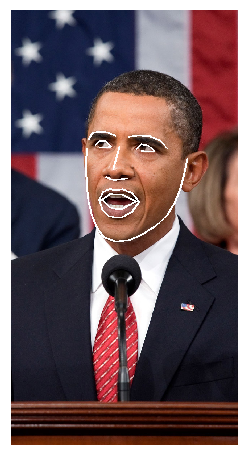

In [18]:
# Load the jpg file into a numpy array
image = face_recognition.load_image_file("img/obama2.jpg")

# Find all facial features in all the faces in the image
face_landmarks_list = face_recognition.face_landmarks(image)

print("I found {} face(s) in this photograph.".format(len(face_landmarks_list)))

# Create a PIL imagedraw object so we can draw on the picture
pil_image = Image.fromarray(image)
draw = ImageDraw.Draw(pil_image)

for face_landmarks in face_landmarks_list:

    # Print the location of each facial feature in this image
    for facial_feature in face_landmarks.keys():
        print("{}\t :{}".format(facial_feature, face_landmarks[facial_feature]))

    # Let's trace out each facial feature in the image with a line!
    for facial_feature in face_landmarks.keys():
        draw.line(face_landmarks[facial_feature], width=5)

# Display the result
plt.imshow(pil_image)

### 2.2 Applying digital makeup (horribly ugly!)

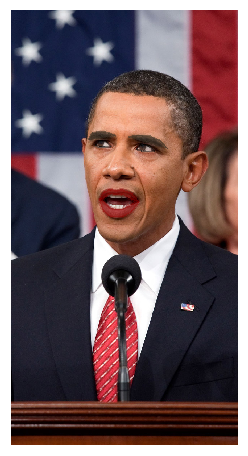

In [23]:
pil_image_modified = Image.fromarray(image)
for face_landmarks in face_landmarks_list:
    d = ImageDraw.Draw(pil_image_modified, 'RGBA')

    # Make the eyebrows into a nightmare
    d.polygon(face_landmarks['left_eyebrow'], fill=(68, 54, 39, 128))
    d.polygon(face_landmarks['right_eyebrow'], fill=(68, 54, 39, 128))
    d.line(face_landmarks['left_eyebrow'], fill=(68, 54, 39, 150), width=5)
    d.line(face_landmarks['right_eyebrow'], fill=(68, 54, 39, 150), width=5)

    # Gloss the lips
    d.polygon(face_landmarks['top_lip'], fill=(150, 0, 0, 128))
    d.polygon(face_landmarks['bottom_lip'], fill=(150, 0, 0, 128))
    d.line(face_landmarks['top_lip'], fill=(150, 0, 0, 64), width=8)
    d.line(face_landmarks['bottom_lip'], fill=(150, 0, 0, 64), width=8)

    # Sparkle the eyes
    d.polygon(face_landmarks['left_eye'], fill=(255, 255, 255, 30))
    d.polygon(face_landmarks['right_eye'], fill=(255, 255, 255, 30))

    # Apply some eyeliner
    d.line(face_landmarks['left_eye'] + [face_landmarks['left_eye'][0]], fill=(0, 0, 0, 110), width=6)
    d.line(face_landmarks['right_eye'] + [face_landmarks['right_eye'][0]], fill=(0, 0, 0, 110), width=6)

# Display result
plt.imshow(pil_image_modified)

Try out different images (e.g. multiple_people.jpg) or your image, and different makeup

In [ ]:
# insert code here

## 3. Identify faces in a picture

### 3.1 Identify and draw boxes on faces

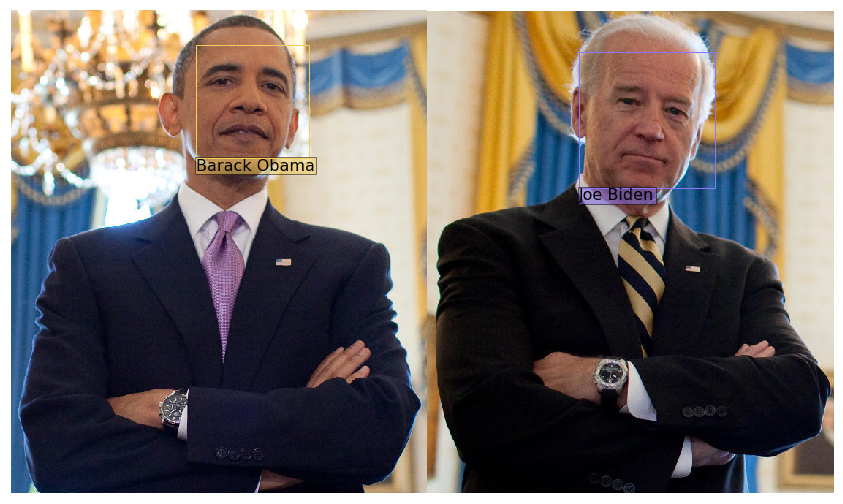

In [24]:
# This is an example of running face recognition on a single image
# and drawing a box around each person that was identified.

# Load a sample picture and learn how to recognize it.
obama_image = face_recognition.load_image_file("img/obama.jpg")
obama_face_encoding = face_recognition.face_encodings(obama_image)[0]

# Load a second sample picture and learn how to recognize it.
biden_image = face_recognition.load_image_file("img/biden.jpg")
biden_face_encoding = face_recognition.face_encodings(biden_image)[0]

# Create arrays of known face encodings and their names
known_face_encodings = [
    obama_face_encoding,
    biden_face_encoding
]
known_face_names = [
    "Barack Obama",
    "Joe Biden"
]

# Load an image with an unknown face
unknown_image = face_recognition.load_image_file("img/two_people.jpg")

# Find all the faces and face encodings in the unknown image
face_locations = face_recognition.face_locations(unknown_image)
face_encodings = face_recognition.face_encodings(unknown_image, face_locations)

fig,ax = plt.subplots(1)
ax.imshow(unknown_image)

# Loop through each face found in the unknown image
for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    # See if the face is a match for the known face(s)
    matches = face_recognition.compare_faces(known_face_encodings, face_encoding)

    name = "Unknown"

    # If a match was found in known_face_encodings, just use the first one.
    if True in matches:
        first_match_index = matches.index(True)
        name = known_face_names[first_match_index]
    
    # Or instead, use the known face with the smallest distance to the new face
    # face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
    # best_match_index = np.argmin(face_distances)
    # if matches[best_match_index]:
    #    name = known_face_names[best_match_index]

    # Draw a box around the face
    color = tuple(np.random.rand(3))
    ax.add_patch(patches.Rectangle((left, top), right-left, bottom-top, fill=False, color=color)) 
    # Add the name under the face bounding box
    ax.text(left, bottom, name,  horizontalalignment='left', verticalalignment='top',
            bbox={'facecolor':color,'alpha':0.5, 'pad':1})

plt.tight_layout()
plt.show()

Let's do it by your own images

### 3.3 Recognize faces in a picture

In [25]:
# Load the jpg files into numpy arrays
unknown_image = face_recognition.load_image_file("img/obama2.jpg")

# Get the face encodings for each face in each image file
# Since there could be more than one face in each image, it returns a list of encodings.
# But since I know each image only has one face, I only care about the first encoding in each image, so I grab index 0.
try:
    biden_face_encoding = face_recognition.face_encodings(biden_image)[0]
    obama_face_encoding = face_recognition.face_encodings(obama_image)[0]
    unknown_face_encoding = face_recognition.face_encodings(unknown_image)[0]
except IndexError:
    print("I wasn't able to locate any faces in at least one of the images. Check the image files. Aborting...")
    quit()

known_faces = [
    biden_face_encoding,
    obama_face_encoding
]

# results is an array of True/False telling if the unknown face matched anyone in the known_faces array
results = face_recognition.compare_faces(known_faces, unknown_face_encoding)

print("Is the unknown face a picture of Biden? {}".format(results[0]))
print("Is the unknown face a picture of Obama? {}".format(results[1]))
print("Is the unknown face a new person that we've never seen before? {}".format(not True in results))

Is the unknown face a picture of Biden? False
Is the unknown face a picture of Obama? True
Is the unknown face a new person that we've never seen before? False


### 3.2 Face distance to measure the similarity between two faces

Often instead of just checking if two faces match or not (True or False), it's helpful to see how similar they are.
You can do that by using the face_distance function.

In [ ]:
# The model was trained in a way that faces with a distance of 0.6 or less should be a match. But if you want to
# be more strict, you can look for a smaller face distance. For example, using a 0.55 cutoff would reduce false
# positive matches at the risk of more false negatives.

# Note: This isn't exactly the same as a "percent match". The scale isn't linear. But you can assume that images with a
# smaller distance are more similar to each other than ones with a larger distance.


# Load some images to compare against
known_obama_image = face_recognition.load_image_file("img/obama.jpg")
known_biden_image = face_recognition.load_image_file("img/biden.jpg")

# Get the face encodings for the known images
obama_face_encoding = face_recognition.face_encodings(known_obama_image)[0]
biden_face_encoding = face_recognition.face_encodings(known_biden_image)[0]

known_encodings = [
    obama_face_encoding,
    biden_face_encoding
]

# Load a test image and get encondings for it
image_to_test = face_recognition.load_image_file("img/obama2.jpg")
image_to_test_encoding = face_recognition.face_encodings(image_to_test)[0]

# See how far apart the test image is from the known faces
face_distances = face_recognition.face_distance(known_encodings, image_to_test_encoding)


for i, face_distance in enumerate(face_distances):
    print("The test image has a distance of {:.2} from known image #{}".format(face_distance, i))
    print("- With a normal cutoff of 0.6, would the test image match the known image? {}".format(face_distance < 0.6))
    print("- With a very strict cutoff of 0.5, would the test image match the known image? {}".format(face_distance < 0.5))
    print("face_distance = {}". format(face_distance))
    print()

## 4. Detect faces from video and displays result in realtime

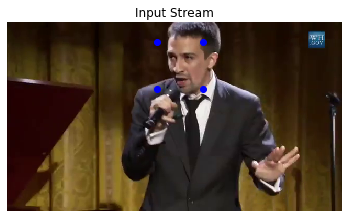

In [14]:
%pylab inline 
import cv2
from IPython.display import clear_output
from matplotlib.pyplot import imshow
import matplotlib.pylab as plt

# Loading video for face detection
video_capture = cv2.VideoCapture("img/hamilton_clip.mp4")

frame_count = 0


while video_capture.isOpened():    
    # Grab a single frame of video
    ret, frame = video_capture.read()
    
    # Bail out when the video file ends
    if not ret:
        video_capture.release()
        break
        
    # We will search face in every 15 frames to speed up process.
    frame_count += 1
    if frame_count % 15 == 0:    
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Display video frame
        title("Input Stream")
        plt.imshow(frame)        

        # Find all the faces and face encodings in the current frame of video
        rgb_frame = frame[:, :, ::-1]
        face_locations = face_recognition.face_locations(rgb_frame)
        
        # If faces were found, we will mark it on frame with blue dots
        for face_location in face_locations:        
            plt.plot(face_location[1], face_location[0], 'bo')
            plt.plot(face_location[1], face_location[2], 'bo')
            plt.plot(face_location[3], face_location[2], 'bo')
            plt.plot(face_location[3], face_location[0], 'bo')

        # Show frame...
        plt.show() 
        # ... and hold it until a new frame appears
        clear_output(wait=True)


Change the number of frame that you search for faces and see what happen

Draw a rectangle around faces

## 5. Recognize faces with a K-nearest neighbors classifier

This example is useful when you wish to recognize a large set of known people, and make a prediction for an unknown person in a feasible computation time.

Algorithm Description:
The knn classifier is first trained on a set of labeled (known) faces and can then predict the person
in an unknown image by finding the k most similar faces (images with closet face-features under eucledian distance) in its training set, and performing a majority vote (possibly weighted) on their label.

For example, if k=3, and the three closest face images to the given image in the training set are one image of Biden and two images of Obama, The result would be 'Obama'.
* This implementation uses a weighted vote, such that the votes of closer-neighbors are weighted more heavily.

Usage:
1. Prepare a set of images of the known people you want to recognize. Organize the images in a single directory
   with a sub-directory for each known person.
2. Then, call the 'train' function with the appropriate parameters. Make sure to pass in the 'model_save_path' if you
   want to save the model to disk so you can re-use the model without having to re-train it.
3. Call 'predict' and pass in your trained model to recognize the people in an unknown image.

In [21]:
import math
import os
import os.path
import pickle

from sklearn import neighbors
from face_recognition.face_recognition_cli import image_files_in_folder

ALLOWED_EXTENSIONS = {'png', 'jpg', 'jpeg'}

Trains a k-nearest neighbors classifier for face recognition.

In [22]:
def train(train_dir, model_save_path=None, n_neighbors=None, knn_algo='ball_tree', verbose=False):
    '''
    :param train_dir: directory that contains a sub-directory for each known person, with its name.
     (View in source code to see train_dir example tree structure)
     Structure:
        <train_dir>/
        ├── <person1>/
        │   ├── <somename1>.jpeg
        │   ├── <somename2>.jpeg
        │   ├── ...
        ├── <person2>/
        │   ├── <somename1>.jpeg
        │   └── <somename2>.jpeg
        └── ...
    :param model_save_path: (optional) path to save model on disk
    :param n_neighbors: (optional) number of neighbors to weigh in classification. Chosen automatically if not specified
    :param knn_algo: (optional) underlying data structure to support knn.default is ball_tree
    :param verbose: verbosity of training
    :return: returns knn classifier that was trained on the given data.
     '''
    X = []
    y = []

    # Loop through each person in the training set
    for class_dir in os.listdir(train_dir):
        if not os.path.isdir(os.path.join(train_dir, class_dir)):
            continue

        # Loop through each training image for the current person
        for img_path in image_files_in_folder(os.path.join(train_dir, class_dir)):
            image = face_recognition.load_image_file(img_path)
            face_bounding_boxes = face_recognition.face_locations(image)

            if len(face_bounding_boxes) != 1:
                # If there are no people (or too many people) in a training image, skip the image.
                if verbose:
                    print("Image {} not suitable for training: {}".format(img_path, "Didn't find a face" if len(face_bounding_boxes) < 1 else "Found more than one face"))
            else:
                # Add face encoding for current image to the training set
                X.append(face_recognition.face_encodings(image, known_face_locations=face_bounding_boxes)[0])
                y.append(class_dir)

    # Determine how many neighbors to use for weighting in the KNN classifier
    if n_neighbors is None:
        n_neighbors = int(round(math.sqrt(len(X))))
        if verbose:
            print("Chose n_neighbors automatically:", n_neighbors)

    # Create and train the KNN classifier
    knn_clf = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors, algorithm=knn_algo, weights='distance')
    knn_clf.fit(X, y)

    # Save the trained KNN classifier
    if model_save_path is not None:
        with open(model_save_path, 'wb') as f:
            pickle.dump(knn_clf, f)

    return knn_clf

Recognizes faces in given image using a trained KNN classifier

In [23]:
def predict(X_img_path, knn_clf=None, model_path=None, distance_threshold=0.6):
    """
    Recognizes faces in given image using a trained KNN classifier
    :param X_img_path: path to image to be recognized
    :param knn_clf: (optional) a knn classifier object. if not specified, model_save_path must be specified.
    :param model_path: (optional) path to a pickled knn classifier. if not specified, model_save_path must be knn_clf.
    :param distance_threshold: (optional) distance threshold for face classification. the larger it is, the more chance
           of mis-classifying an unknown person as a known one.
    :return: a list of names and face locations for the recognized faces in the image: [(name, bounding box), ...].
        For faces of unrecognized persons, the name 'unknown' will be returned.
    """
    #if not os.path.isfile(X_img_path) or os.path.splitext(X_img_path)[1][1:] not in ALLOWED_EXTENSIONS:
        #raise Exception("Invalid image path: {}".format(X_img_path))

    #if knn_clf is None and model_path is None:
        #raise Exception("Must supply knn classifier either thourgh knn_clf or model_path")

    # Load a trained KNN model (if one was passed in)
    if knn_clf is None:
        with open(model_path, 'rb') as f:
            knn_clf = pickle.load(f)

    # Load image file and find face locations
    X_img = face_recognition.load_image_file(X_img_path)
    X_face_locations = face_recognition.face_locations(X_img)

    # If no faces are found in the image, return an empty result.
    if len(X_face_locations) == 0:
        return []

    # Find encodings for faces in the test iamge
    faces_encodings = face_recognition.face_encodings(X_img, known_face_locations=X_face_locations)

    # Use the KNN model to find the best matches for the test face
    closest_distances = knn_clf.kneighbors(faces_encodings, n_neighbors=1)
    are_matches = [closest_distances[0][i][0] <= distance_threshold for i in range(len(X_face_locations))]

    # Predict classes and remove classifications that aren't within the threshold
    return [(pred, loc) if rec else ("unknown", loc) for pred, loc, rec in zip(knn_clf.predict(faces_encodings), X_face_locations, are_matches)]


Shows the face recognition results visually.

In [24]:
def show_prediction_labels_on_image(img_path, predictions):
    """
    :param img_path: path to image to be recognized
    :param predictions: results of the predict function
    :return:
    """
    pil_image = plt.imread(img_path)
    fig,ax = plt.subplots(1)
    ax.imshow(pil_image)
    
    for name, (top, right, bottom, left) in predictions:
        # Draw a box around the face using the Pillow module
        color = tuple(np.random.rand(3))
        ax.add_patch(patches.Rectangle((left, top), right-left, bottom-top, fill=False, color=color)) 
        # Add the name under the face bounding box
        ax.text(left, bottom, name,  horizontalalignment='left', verticalalignment='top',
                bbox={'facecolor':color,'alpha':0.4, 'pad':1})
    plt.show()

main function

Training KNN classifier...
Training complete!
Looking for faces in alex_lacamoire1.jpg
- Found alex_lacamoire at (633, 206)


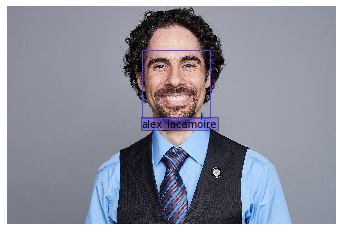

Looking for faces in johnsnow_test1.jpg
- Found kit_harington at (262, 180)


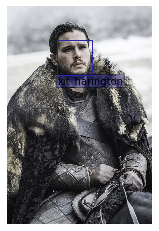

Looking for faces in kit_with_rose.jpg
- Found rose_leslie at (79, 130)
- Found kit_harington at (247, 92)


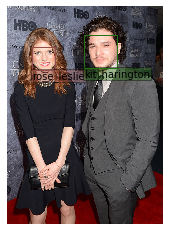

Looking for faces in obama1.jpg
- Found obama at (546, 204)


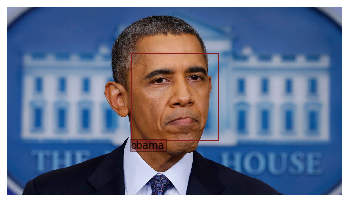

Looking for faces in obama_and_biden.jpg
- Found biden at (737, 449)
- Found obama at (1133, 390)
- Found unknown at (1594, 1062)


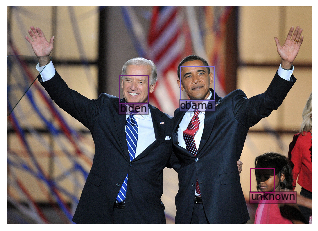

In [20]:
if __name__ == "__main__":
    # STEP 1: Train the KNN classifier and save it to disk
    # Once the model is trained and saved, you can skip this step next time.
    print("Training KNN classifier...")
    classifier = train("knn_examples/train", model_save_path="out/trained_knn_model.clf", n_neighbors=2)
    print("Training complete!")
   
    # STEP 2: Using the trained classifier, make predictions for unknown images
    for image_file in os.listdir("knn_examples/test"):
        if image_file.endswith('.jpg'):
    
            full_file_path = os.path.join("knn_examples/test", image_file)

            print("Looking for faces in {}".format(image_file))

            # Find all people in the image using a trained classifier model
            # Note: You can pass in either a classifier file name or a classifier model instance
            predictions = predict(full_file_path, model_path="out/trained_knn_model.clf")
            
            # Print results on the console
            for name, (top, right, bottom, left) in predictions:
                print("- Found {} at ({}, {})".format(name, left, top))
            
            # Display results overlaid on an image
            show_prediction_labels_on_image(os.path.join("knn_examples/test", image_file), predictions)

Now, do it for your own dataset